In [1]:
from learning import learn_model
from agent_distribution import AgentDistribution
from utils import compute_continuity_noise, fixed_point_interpolation_true_distribution
from optimal_beta import optimal_beta_expected_policy_loss 
from reparametrized_gradient import plot_total_derivative

import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_types = 20
d = 2
etas = np.random.uniform(0.3, 0.8, n_types * d).reshape(n_types, d, 1)
gammas = np.random.uniform(1., 8., n_types *d).reshape(n_types, d, 1)
dic = {"etas":etas, "gammas":gammas}
agent_dist = AgentDistribution(n=100000, d=d, n_types=n_types, types=dic, prop=None)
sigma = compute_continuity_noise(agent_dist) + 0.05
q = 0.7
f = fixed_point_interpolation_true_distribution(agent_dist, sigma, 0.7, plot=False, savefig=None)

Computing fixed points...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:58<00:00,  2.38s/it]


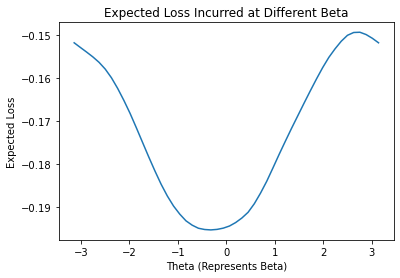

Opt Theta: -0.32057067893773405
Min Loss: -0.19540943625188398


In [3]:
min_loss, opt_beta, opt_s_beta, thetas, losses = optimal_beta_expected_policy_loss(agent_dist, sigma, f, plot=True)
opt_theta = np.arctan2(opt_beta[1], opt_beta[0])
print("Opt Theta: {}".format(opt_theta.item()))
print("Min Loss: {}".format(min_loss))

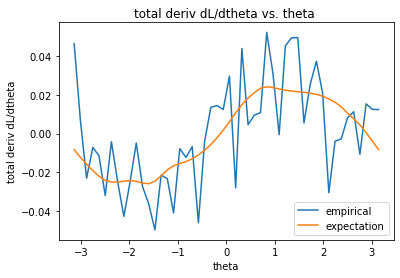

In [4]:
plot_total_derivative(agent_dist, sigma, q, f)

In [5]:
emp_thetas, emp_losses = learn_model(agent_dist, sigma, q, f, learning_rate=1, max_iter=250)

Loss: -0.1510773336205385 Theta:2.6099682837710487 Gradient: 0.20469626657849366
Loss: -0.15229096454371405 Theta:2.405272017192555 Gradient: 0.20139494261834465
Loss: -0.1550916379112469 Theta:2.2038770745742102 Gradient: 0.21867925909704575
Loss: -0.15894718946131625 Theta:1.9851978154771646 Gradient: 0.1567835728143966
Loss: -0.16131706207577085 Theta:1.828414242662768 Gradient: 0.1954053070567927
Loss: -0.16566296300447594 Theta:1.6330089356059754 Gradient: 0.14770315772146758
Loss: -0.16900580249415995 Theta:1.4853057778845078 Gradient: 0.12371609879971682
Loss: -0.17153527661588497 Theta:1.361589679084791 Gradient: 0.18923954375445062
Loss: -0.17578662072310247 Theta:1.1723501353303405 Gradient: 0.11035548186232079
Loss: -0.17861374195894583 Theta:1.0619946534680198 Gradient: 0.08944681361005137
Loss: -0.18089516096135796 Theta:0.9725478398579684 Gradient: 0.09980727326318861
Loss: -0.18262896251529392 Theta:0.8727405665947798 Gradient: 0.05583271747709755
Loss: -0.18430315099620

Loss: -0.1867960279396468 Theta:0.6900318293716704 Gradient: -0.03252143919443136
Loss: -0.18604113061834637 Theta:0.7225532685661018 Gradient: 0.02427266702686936
Loss: -0.18692758814055233 Theta:0.6982806015392324 Gradient: -0.026044848877505494
Loss: -0.18581311541333068 Theta:0.7243254504167379 Gradient: 0.01822871232546567
Loss: -0.18682497419395924 Theta:0.7060967380912723 Gradient: 0.00900696932480901
Loss: -0.1868954147043055 Theta:0.6970897687664632 Gradient: 0.013542932187360733
Loss: -0.18720545267324287 Theta:0.6835468365791025 Gradient: -0.006667442537538971
Loss: -0.18697739799216906 Theta:0.6902142791166415 Gradient: 0.004506389046951349
Loss: -0.1869627135326187 Theta:0.6857078900696901 Gradient: -0.01014132206282915
Loss: -0.1866886386804238 Theta:0.6958492121325193 Gradient: 0.021935530460860234
Loss: -0.187278643619716 Theta:0.673913681671659 Gradient: -0.03785775985395581
Loss: -0.1863184486689376 Theta:0.7117714415256148 Gradient: 0.006545819675906291
Loss: -0.1866

Loss: -0.18692174674265805 Theta:0.687387309519415 Gradient: 0.016431152485069173
Loss: -0.1874025921616285 Theta:0.6709561570343457 Gradient: -0.011281740029764589
Loss: -0.18698499128329338 Theta:0.6822378970641103 Gradient: -0.014357495835416371
Loss: -0.1871131984401389 Theta:0.6965953928995267 Gradient: 0.0049522990691740374
Loss: -0.18656886611399584 Theta:0.6916430938303526 Gradient: -0.04127549259232924
Loss: -0.18610245877802875 Theta:0.7329185864226818 Gradient: -0.008455775263649434
Loss: -0.18575008062397344 Theta:0.7413743616863313 Gradient: -0.008877178486262478
Loss: -0.18535708720641753 Theta:0.7502515401725938 Gradient: -0.023485053280141666
Loss: -0.18554528338463575 Theta:0.7737365934527354 Gradient: 0.044210188499916696
Loss: -0.1860612511779129 Theta:0.7295264049528187 Gradient: -0.0033068564409416143
Loss: -0.1861302249786495 Theta:0.7328332613937604 Gradient: 0.037064769201461074
Loss: -0.18686403899710213 Theta:0.6957684921922993 Gradient: 0.012959499048019352
L

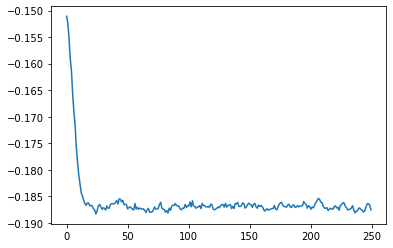

In [6]:
plt.plot(list(range(len(emp_losses))), emp_losses)

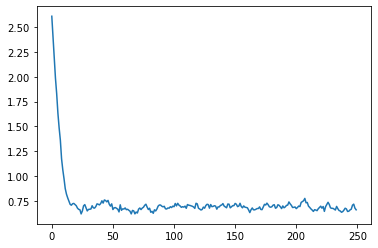

In [7]:
plt.plot(list(range(len(emp_thetas))), emp_thetas)